In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('files/ultrasom.jpg', 0)

In [3]:
img_fft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
img_fft_shift = np.fft.fftshift(img_fft)

In [4]:
magnitude_spectrum = 20*np.log(cv2.magnitude(img_fft_shift[:,:,0],img_fft_shift[:,:,1]))

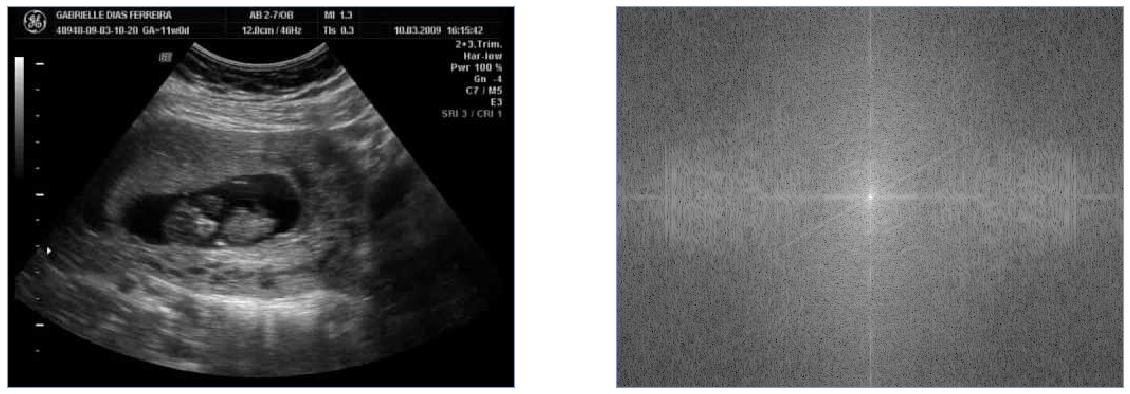

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
w, h = img.shape
w, h

(360, 480)

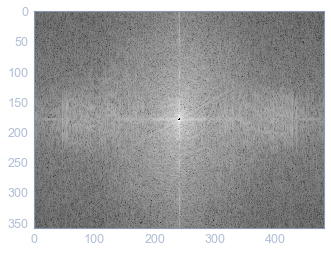

In [7]:
img_fft_shift_circle = magnitude_spectrum.copy()

mask = cv2.circle(img_fft_shift_circle, (h//2, w//2), 1, 0, -1)
plt.imshow(mask, cmap='gray');

In [8]:
mask2 = np.zeros((w,h,2),np.uint8)
mask2[:,:,0] = mask
mask2[:,:,1] = mask

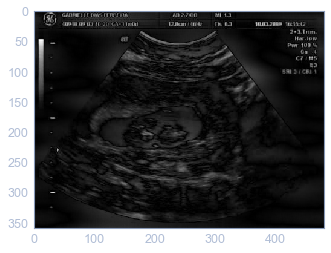

In [9]:
fshift = img_fft_shift * mask2

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.imshow(img_back, cmap='gray');

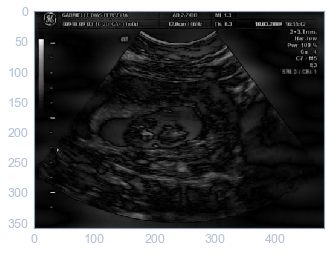

In [10]:
img_back_norm = cv2.normalize(img_back,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
plt.imshow(img_back_norm, cmap='gray');

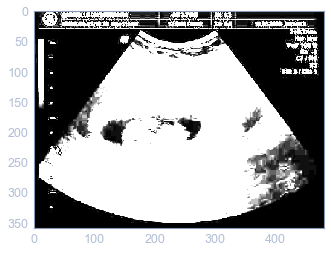

In [11]:
mask_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(cv2.multiply(img, mask_norm), cmap='gray');